# Elections Theory

In [198]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

## Import data

In [199]:
jef_df = pd.read_csv('data/jef_data.csv')
jef_df.head()

,id,total,to_distribute,n_elements,std_div_mod,len_votes,mean_dev
0,1,35.0,35,608.0,16.884200,4,0.0008
1,2,35.0,35,613.0,16.884300,4,0.0037
2,3,35.0,35,610.0,16.993600,4,0.0012
3,4,35.0,35,612.0,17.100700,4,0.0025
4,5,33.0,35,607.0,16.777782,4,0.0019


1. Counting how many entries have `to_distribute` different from `total`.

In [205]:
jef_df["total"]=jef_df["total"].astype(np.int32)

In [206]:
jef_df[jef_df["total"]-jef_df["to_distribute"]!=0].shape[0]

3141

In [207]:
jef_df_cleaned=jef_df[~(jef_df["total"]-jef_df["to_distribute"]!=0)]

In [208]:
jef_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6859 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6859 non-null   int64  
 1   total          6859 non-null   int32  
 2   to_distribute  6859 non-null   int64  
 3   n_elements     6859 non-null   float64
 4   std_div_mod    6859 non-null   float64
 5   len_votes      6859 non-null   int64  
 6   mean_dev       6859 non-null   float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 401.9 KB


In [209]:
jef_df_cleaned["n_elements_per_distr"] = jef_df_cleaned["n_elements"] / jef_df_cleaned["to_distribute"]
print(f"Divisor Prd maximo: {jef_df_cleaned['n_elements_per_distr'].max()}")
print(f"Divisor Prd minimo: {jef_df_cleaned['n_elements_per_distr'].min()}")
print(f"n_elements maximo: {jef_df_cleaned['n_elements'].max()}")
print(f"n_elements minimo: {jef_df_cleaned['n_elements'].min()}")
print(f"mean_dev maxima: {jef_df_cleaned['mean_dev'].max()}")
print(f"mean_dev minima: {jef_df_cleaned['mean_dev'].min()}")

Divisor Prd maximo: 17.8
Divisor Prd minimo: 17.228571428571428
n_elements maximo: 623.0
n_elements minimo: 603.0
mean_dev maxima: 0.0045
mean_dev minima: 0.0006


In [210]:
jef_df_cleaned["n_els_per_distr_cat"] = np.floor(jef_df_cleaned["n_elements_per_distr"])

2. Developing the model.

In [212]:
df_to_study = jef_df_cleaned[(jef_df_cleaned["to_distribute"]==35) & (jef_df_cleaned["len_votes"]==4)]
df_to_study.head()

,id,total,to_distribute,n_elements,std_div_mod,len_votes,mean_dev,n_elements_per_distr,n_els_per_distr_cat
0,1,35,35,608.0,16.8842,4,0.0008,17.371429,17.0
1,2,35,35,613.0,16.8843,4,0.0037,17.514286,17.0
2,3,35,35,610.0,16.9936,4,0.0012,17.428571,17.0
3,4,35,35,612.0,17.1007,4,0.0025,17.485714,17.0
5,6,35,35,612.0,16.9957,4,0.0016,17.485714,17.0


In [217]:
import statsmodels.api as sm
import sklearn.metrics as sk

Y = df_to_study['std_div_mod']
X = df_to_study['n_elements']
X = sm.add_constant(X)   # add a constant to the model
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            std_div_mod   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                 1.725e+04
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:13:03   Log-Likelihood:                 8865.8
No. Observations:                6859   AIC:                        -1.773e+04
Df Residuals:                    6857   BIC:                        -1.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3957      0.155    -21.953      0.0

3. Correlation between the target and remaining features.

In [214]:
Y = df_to_study['std_div_mod']
X = df_to_study['n_elements']

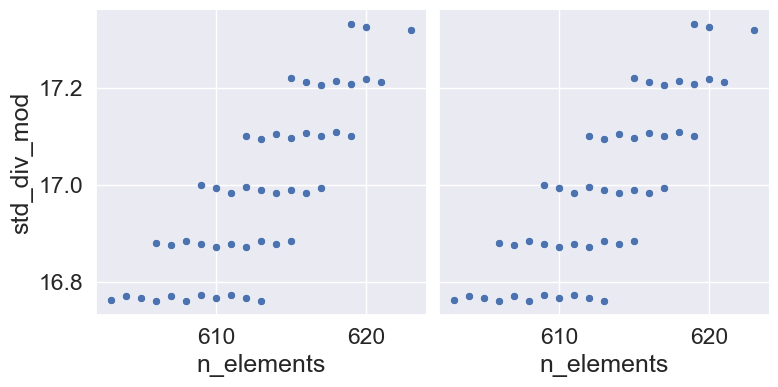

In [215]:
# Visualise scatter plot of each one of the dependent variables separately VS dependent variable Y
sns.pairplot(df_to_study, x_vars=['n_elements','n_elements'], y_vars = 'std_div_mod', size = 4, kind = 'scatter' )

In [ ]:
#total	to_distribute	n_elements	std_div_mod	len_votes

<Axes: xlabel='n_elements', ylabel='std_div_mod'>

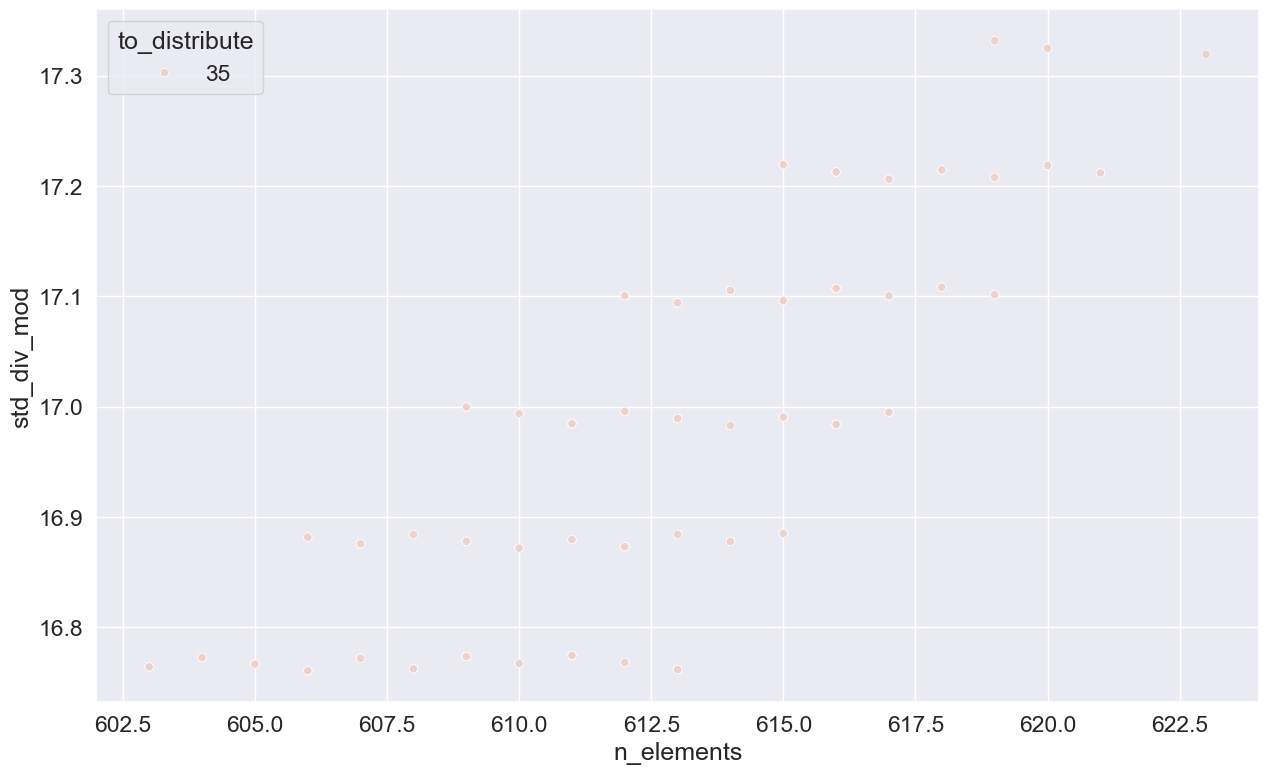

In [216]:
sns.scatterplot(data=df_to_study,x='n_elements',y='std_div_mod',hue='to_distribute')

In [124]:
from sklearn.model_selection import train_test_split

# Perform Linear Regression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
model_train = sm.OLS(Y_train,X_train_sm)
results_train = model_train.fit()

# Show model's summary 
results_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.39e-29
Time:                        17:45:14   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# Performing predictions on the test set
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [127]:
# Predict the Y values corresponding to X_test_sm
pred_test = results_train.predict(X_test_sm)

# R-squared value from train model and from the preditected Y from test set
print(f"R-square train set: {round(results_train.rsquared,4)}")
print(f"R-square test set: {round(sk.r2_score(Y_test,pred_test),4)}")
print(f"Both values indicate that the model is a good fit.")
if results_train.rsquared > sk.r2_score(Y_test,pred_test):
    print("R: R-square train > R-square test --> The model is overfitting.")
else:
    print("R: R-square train < R-square test --> It means that the training data doesn't overfits the model.")



R-square train set: 0.7849
R-square test set: 0.7872
Both values indicate that the model is a good fit.
R: R-square train < R-square test --> It means that the training data doesn't overfits the model.


10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfied with the model's performance?

Naïve Training MAE: 40.38
Training MAE: 16.92
MASE: 0.419 --> MASE < 1 --> algorithm is performing fine compared with naive forecast


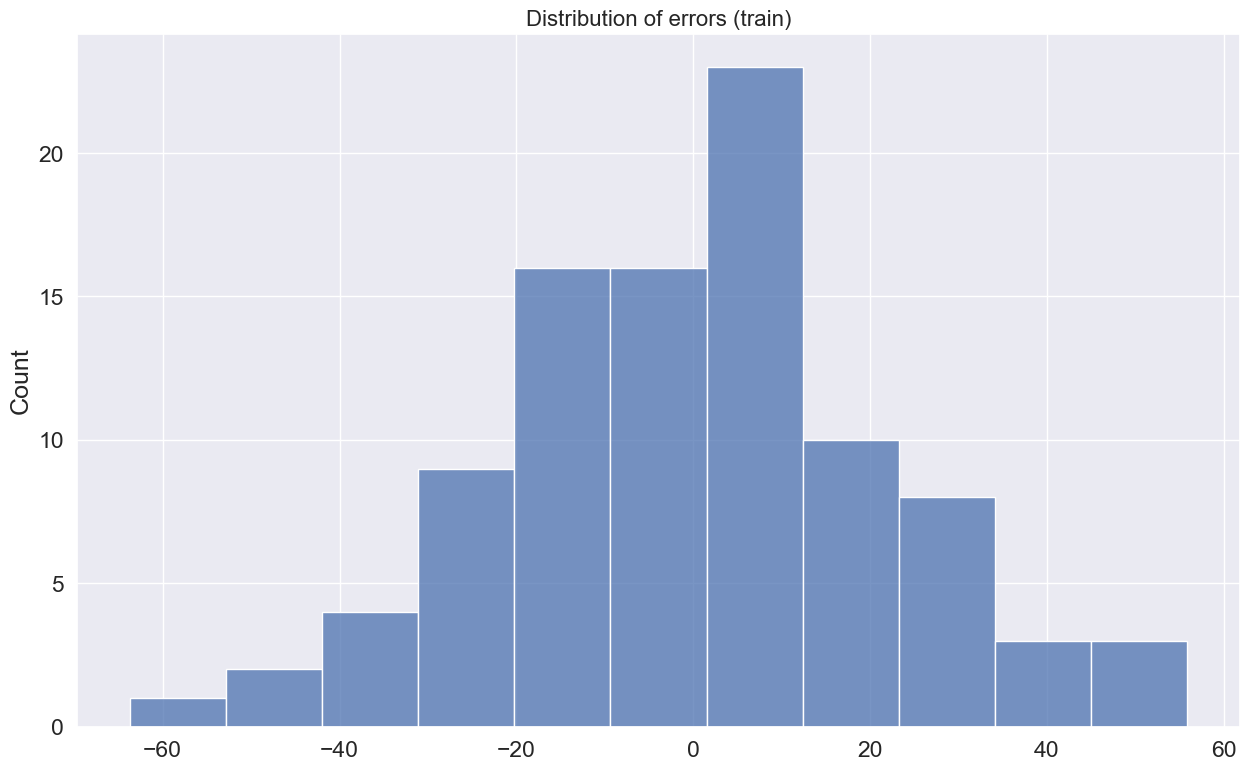

In [62]:
def mae(Y, Y_hat): 
    return round(np.mean(np.abs(Y - Y_hat)), 2)

#Using train data set
pred_train = results_train.predict(X_train_sm)

print(f'Naïve Training MAE: {mae(Y_train, np.mean(Y_train))}') 
print(f'Training MAE: {mae(Y_train, pred_train)}') 
mase_train = round(mae(Y_train, pred_train)/mae(Y_train, np.mean(Y_train)),4)
if (mase_train>1):
    print(f"MASE: {mase_train} --> MASE > 1 --> algorithm is performing poorly compared with naive forecast")
else:
    print(f"MASE: {mase_train} --> MASE < 1 --> algorithm is performing fine compared with naive forecast")

sns.histplot(Y_train - pred_train).set_title("Distribution of errors (train)", size=16)
plt.show()

Naïve Test MAE: 39.94
Test MAE: 17.18
MASE: 0.4301 --> MASE < 1 --> algorithm is performing fine compared with naive forecast
R: Looking for MAE value, we can conclude that the performance of the model is good.       
 The values of training data and testing data are similar, being the training strictly lower than the other. So I'm satisfied..


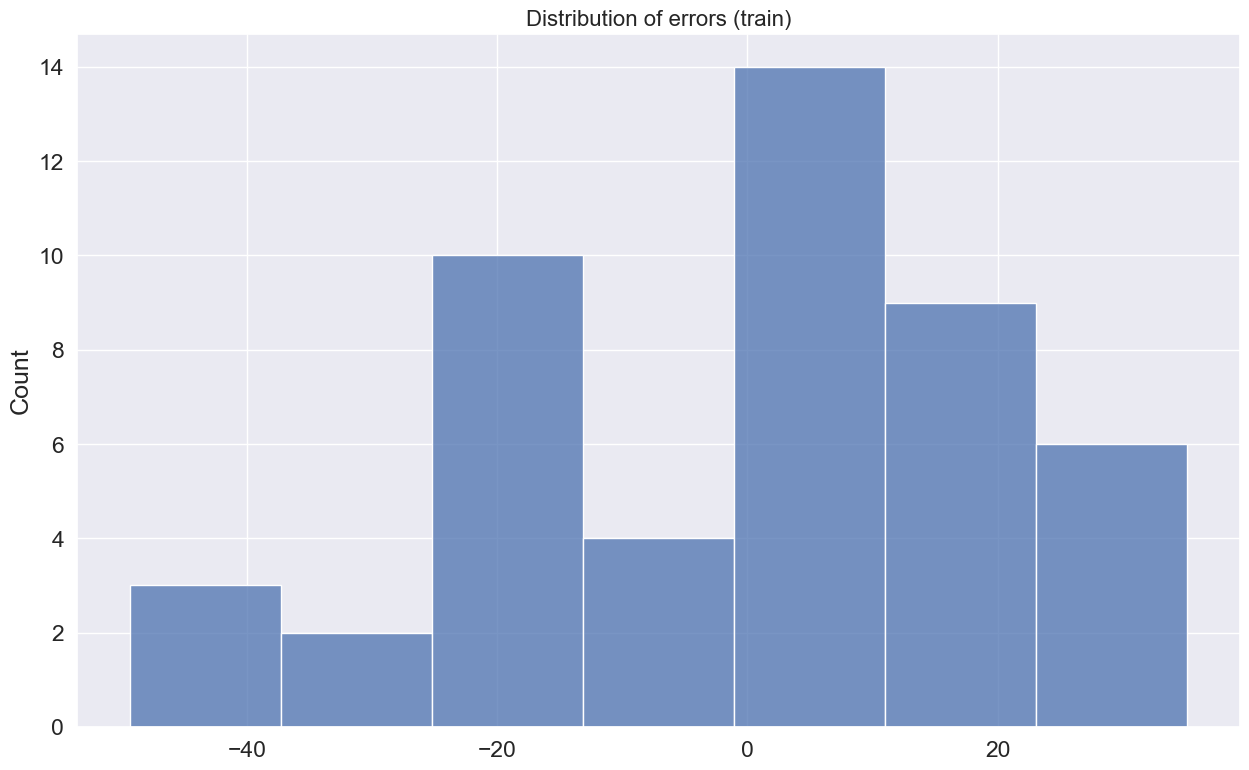

In [132]:
#Using test data set
print(f'Naïve Test MAE: {mae(Y_test, np.mean(Y_test))}') 
print(f'Test MAE: {mae(Y_test, pred_test)}') 
mase_test = round(mae(Y_test, pred_test)/mae(Y_test, np.mean(Y_test)),4)
if (mase_test>1):
    print(f"MASE: {mase_test} --> MASE > 1 --> algorithm is performing poorly compared with naive forecast")
else:
    print(f"MASE: {mase_test} --> MASE < 1 --> algorithm is performing fine compared with naive forecast")

#MASE was not asked but I found interesting to calculate too and looking for this matric, I'm satisfied with model's performance because value of MASE is less then 1.
print(f"R: Looking for MAE value, we can conclude that the performance of the model is good. \
      \n The values of training data and testing data are similar, being the training strictly lower than the other. So I'm satisfied..")

sns.histplot(Y_test - pred_test).set_title("Distribution of errors (train)", size=16)
plt.show()